In [1]:
import numpy as np
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data = pd.read_csv("flights.csv")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# split into training/validation and testing set
train, test = train_test_split(data, test_size=0.45)

In [4]:
train.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1400034,2015,3,31,2,WN,123,N964WN,PHL,MCO,1815,...,2112.0,17.0,0,0,NaN,11.0,0.0,6.0,0.0,0.0
3573699,2015,8,10,1,UA,1548,N39450,IAH,PHL,1747,...,2208.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4264259,2015,9,23,3,MQ,3104,N530MQ,DFW,LIT,1005,...,1112.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1286022,2015,3,24,2,DL,2086,N348NW,ATL,LGA,1845,...,2109.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1500653,2015,4,7,2,NK,624,N517NK,DEN,ORD,600,...,923.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Basic description of every column present in the dataframe
pd.DataFrame.describe(train)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,3200493.0,3.200493e+06,3.200493e+06,3.200493e+06,3.200493e+06,3.200493e+06,3.153093e+06,3.153093e+06,3.151487e+06,3.151487e+06,...,3.200493e+06,3.149579e+06,3.142639e+06,3.200493e+06,3.200493e+06,585508.000000,585508.000000,585508.000000,585508.000000,585508.000000
mean,2015.0,6.525440e+00,1.570582e+01,3.925830e+00,2.173003e+03,1.329497e+03,1.335099e+03,9.372759e+00,1.607131e+01,1.357018e+03,...,1.493542e+03,1.476352e+03,4.409058e+00,2.618347e-03,1.545824e-02,13.474419,0.079111,18.985935,23.450515,2.903185
std,0.0,3.404840e+00,8.780887e+00,1.989236e+00,1.757118e+03,4.837357e+02,4.963576e+02,3.711272e+01,8.906729e+00,4.979664e+02,...,5.072045e+02,5.263034e+02,3.930523e+01,5.110276e-02,1.233665e-01,27.899025,2.348248,48.347168,43.239974,20.248547
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.689000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.916000e+03,8.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.320000e+03,2.359000e+03,2.400000e+03,1.878000e+03,2.000000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.898000e+03,1.000000e+00,1.000000e+00,991.000000,573.000000,1878.000000,1331.000000,1211.000000


In [6]:
train.shape

(3200493, 31)

In [7]:
# List all the columns present in the data frame
list(train.columns.values)

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [8]:
# Drop columns which aren't interesting/needed for quicker EDA. Store in temp dataframe
temp_df = train[['AIRLINE', 'DEPARTURE_DELAY', 'DISTANCE']]

In [9]:
# Full dataset takes wayyy too long for panda profiling to load 
profiling_df = temp_df.iloc[:500000]

In [10]:
# Pandas Profiling 
profile = ProfileReport(profiling_df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [11]:
profile

> Explore the relationship between `AIRLINE` and `DEPARTURE_DELAY`

In [12]:
# Group the data by AIRLINE
dfg = temp_df.groupby(by = 'AIRLINE')

In [13]:
# Average Departure Time for each AIRLINE
average_airline_delay = dfg.aggregate('mean').loc[:,'DEPARTURE_DELAY']
average_airline_delay

AIRLINE
AA     8.892405
AS     1.866083
B6    11.515907
DL     7.312369
EV     8.703930
F9    13.253206
HA     0.462217
MQ    10.251966
NK    15.947279
OO     7.785193
UA    14.458073
US     6.247281
VX     9.243270
WN    10.579081
Name: DEPARTURE_DELAY, dtype: float64

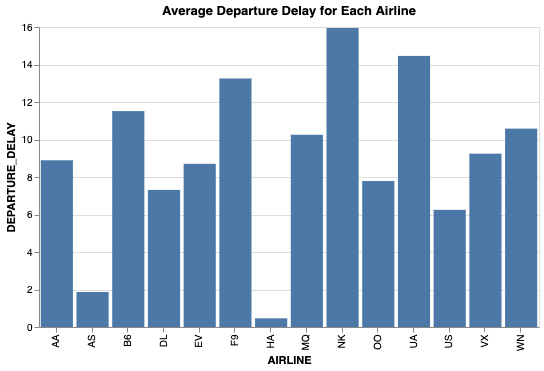

In [14]:
source = pd.DataFrame({
    'AIRLINE' : average_airline_delay.keys(),
    'DEPARTURE_DELAY' : average_airline_delay
})

alt.Chart(source).mark_bar().encode(
    alt.X('AIRLINE:N'),
    alt.Y('DEPARTURE_DELAY:Q'),
    tooltip=['DEPARTURE_DELAY']
).properties(width = 500,title = "Average Departure Delay for Each Airline").interactive()

>Explore the relationship between `DISTANCE` and `DEPARTURE_DELAY`

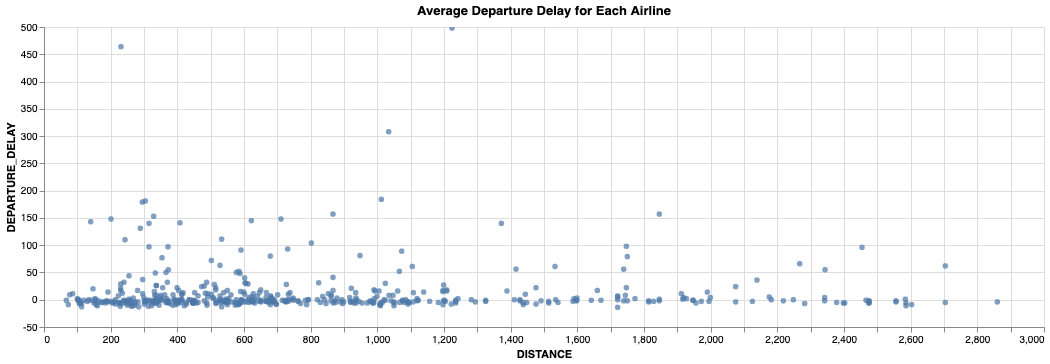

In [15]:
# Since the training data frame is already shuffled
# Drop some rows so, my computer won't crash trying to plot every single point
df_point_plot = temp_df.iloc[:500]

alt.Chart(df_point_plot).mark_circle().encode(
    alt.X('DISTANCE:Q'),
    alt.Y('DEPARTURE_DELAY:Q'),
    tooltip=['DEPARTURE_DELAY']
).properties(width = 1000,title = "Average Departure Delay for Each Airline").interactive()